In [1]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import cv2
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut, apply_windowing
from skimage import color, data, restoration
from scipy.signal import wiener

In [16]:
!pip install python-gdcm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
import gdcm

In [18]:
!pip install pylibjpeg-libjpeg

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 8.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [3]:
import libjpeg

In [4]:
from pydicom.pixel_data_handlers import pillow_handler
pillow_handler.PillowJPEGTransferSyntaxes.append('1.2.840.10008.1.2.4.70')

In [5]:
from PIL import Image

In [5]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
aiofiles                     22.1.0
aiosqlite                    0.19.0
anyio                        3.6.2
appdirs                      1.4.4
argcomplete                  2.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
blivet                       3.7.1
blivet-gui                   2.4.1
Brlapi                       0.8.4
Brotli                       1.0.9
cachetools                   5.3.0
cairocffi                    1.4.0
certifi                      2022.12.7
cffi                         1.15.1
chardet                      5.1.0
charset-normalizer           3.1.0

In [3]:
def convert_to_16_bit_png_file(img_data, debug=False):
    array_buffer = img_data.tobytes()
    if debug:
        print(len(array_buffer))
        print(img_data.T.shape)
    img = Image.new("I", img_data.T.shape)
    img.frombytes(array_buffer, 'raw', "I;16")
    return np.asarray(img)

In [36]:
def show_images(img1, img2, title1='', title2='', cmap='gray'):
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.title(title1)
    plt.imshow(img1, cmap=cmap)


    plt.subplot(122)
    plt.title(title2)
    plt.imshow(img2, cmap=cmap)

In [11]:
image_path = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/1.dicom"
image_path2 = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/2.dicom"
image_path3 = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/3.dcm"
image_path4a = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/4a.dicom"
image_path4b = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/4b.dicom"
image_path5a = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/5a.dcm"
image_path5b = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/5b.dcm"
image_path6 = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/dicom/6.dcm"
image_path7 = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/bcd_subset/download_dataset/train_images/28427247.dcm"
image_path9 = "/home/dimatkchnk/praca_dyplomowa/images/samples-from-databases/bcd_subset/download_dataset/train_images/79584811.dcm"
image_path_bcd = "/home/dimatkchnk/praca_dyplomowa/images/dicom-for-unet-bcd/19617348.dcm"
image_path_vindr = "/home/dimatkchnk/praca_dyplomowa/images/dicom-for-unet-vindr/physionet.org/files/vindr-mammo/1.0.0/images/0a1dc220382dfae8af7f04d91fc99cfb/42b7cc3c5815868327568035e624c631.dicom"

In [4]:
def load_image_pydicom(img_path, voi_lut=False, modality_lut=False, windowing=False, return_ds=False):
    dataset = pydicom.dcmread(img_path)
    img = dataset.pixel_array
    if voi_lut:
        img = apply_voi_lut(img, dataset)
    if modality_lut:
        img = apply_modality_lut(img, dataset)
    if windowing:
        img = apply_windowing(img, dataset)
    if dataset.PhotometricInterpretation == "MONOCHROME1":
        img = np.amax(img) - img
    if return_ds:
        return img, dataset
    else:
        return img

In [12]:
ds_bcd = pydicom.dcmread(image_path_bcd)
ds_vindr = pydicom.dcmread(image_path_vindr)

In [13]:
ds_bcd


Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.8172.1.19617348
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.8172.1.19617348
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '185244.176213'
(0010, 0020) Patient ID                          LO: '8172'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.8172
(0020, 000e) Series Instance UID    

In [14]:
ds_vindr

/home/dimatkchnk/.local/lib/python3.11/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '42b7cc3c5815868327568035e624c631'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/home/dimatkchnk/.local/lib/python3.11/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '0a1dc220382dfae8af7f04d91fc99cfb'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/home/dimatkchnk/.local/lib/python3.11/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: 'd99784b33e16a3c59d47ec4037d62e16'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 42b7cc3c5815868327568035e624c631
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RadiAnt-2020.1.1'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 42b7cc3c5815868327568035e624c631
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 1090) Manufacturer's Model Name           LO: 'Mammomat Inspiration'
(0010, 0040) 

In [61]:
img = load_image_pydicom(image_path2)
img_voi = load_image_pydicom(image_path2, voi_lut=True)

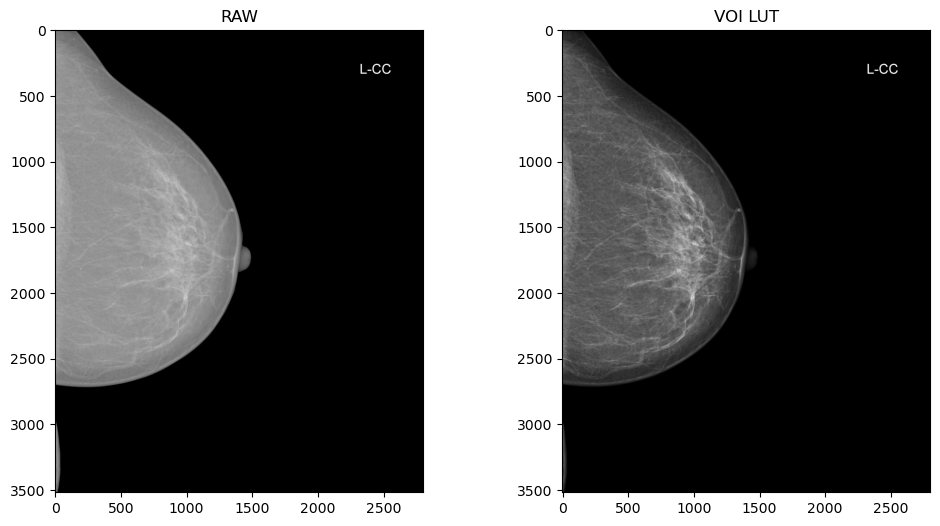

In [62]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("RAW")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("VOI LUT")
plt.imshow(img_voi, cmap='gray')

In [8]:
img = load_image_pydicom(image_path2)
img_voi = load_image_pydicom(image_path2, windowing=True)

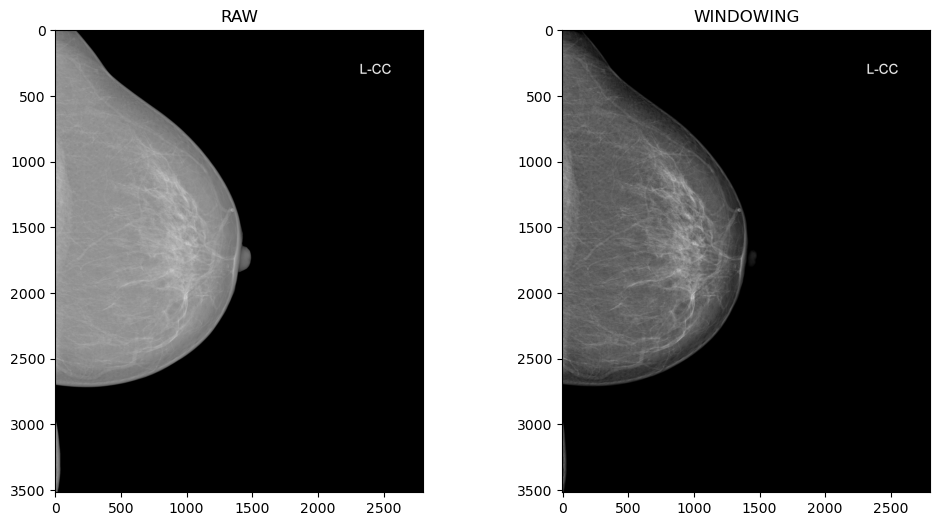

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("RAW")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("WINDOWING")
plt.imshow(img_voi, cmap='gray')

In [52]:
img = load_image_pydicom(image_path2, voi_lut=True)
img_voi = load_image_pydicom(image_path2, voi_lut=False, modality_lut=True, windowing=True)

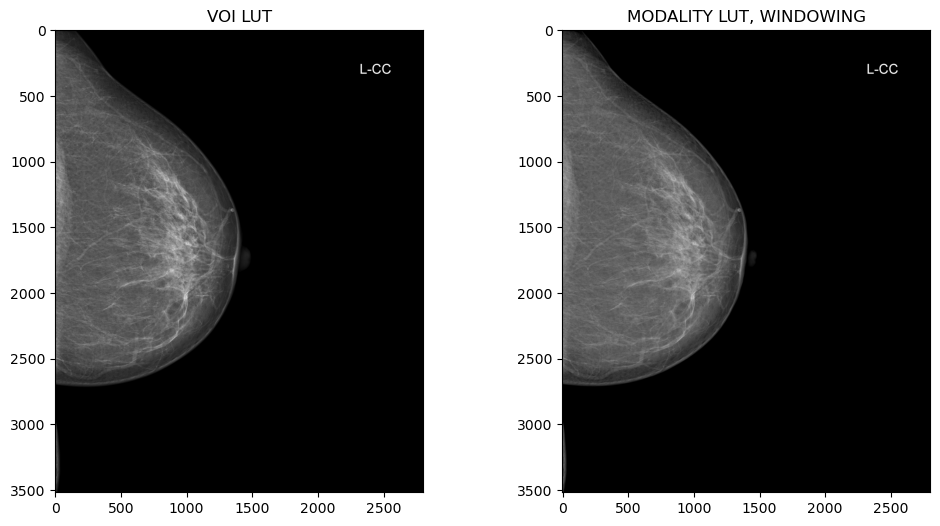

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("VOI LUT")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("MODALITY LUT, WINDOWING")
plt.imshow(img_voi, cmap='gray')

In [55]:
img = load_image_pydicom(image_path2, voi_lut=True)
img_voi = load_image_pydicom(image_path2, windowing=True)

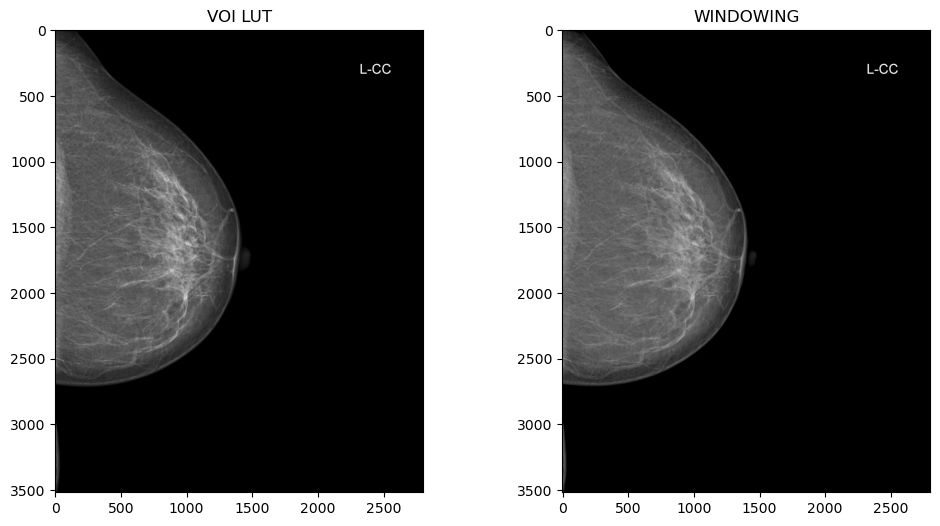

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("VOI LUT")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("WINDOWING")
plt.imshow(img_voi, cmap='gray')

In [57]:
img = load_image_pydicom(image_path2, voi_lut=True)
img_voi = load_image_pydicom(image_path2, voi_lut=True, modality_lut=True)

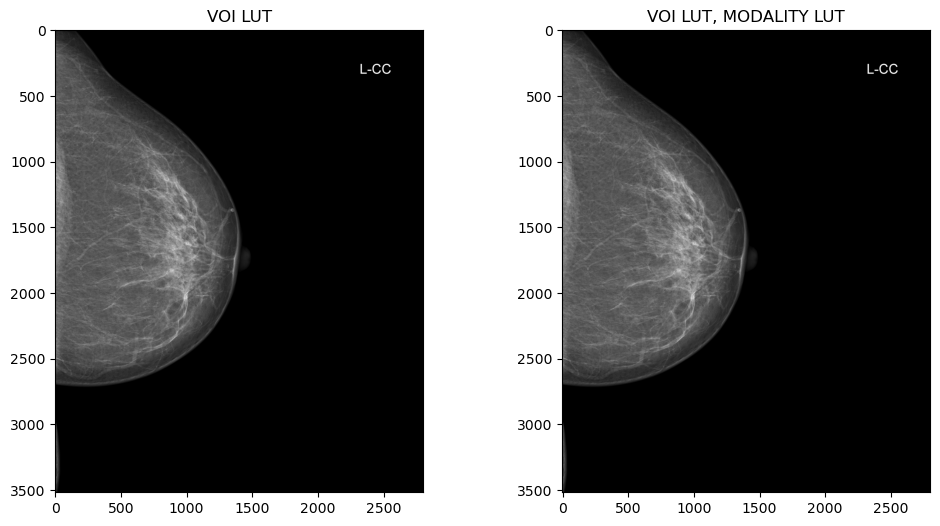

In [58]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("VOI LUT")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("VOI LUT, MODALITY LUT")
plt.imshow(img_voi, cmap='gray')

In [63]:
img = load_image_pydicom(image_path)
img_voi = load_image_pydicom(image_path, voi_lut=True)

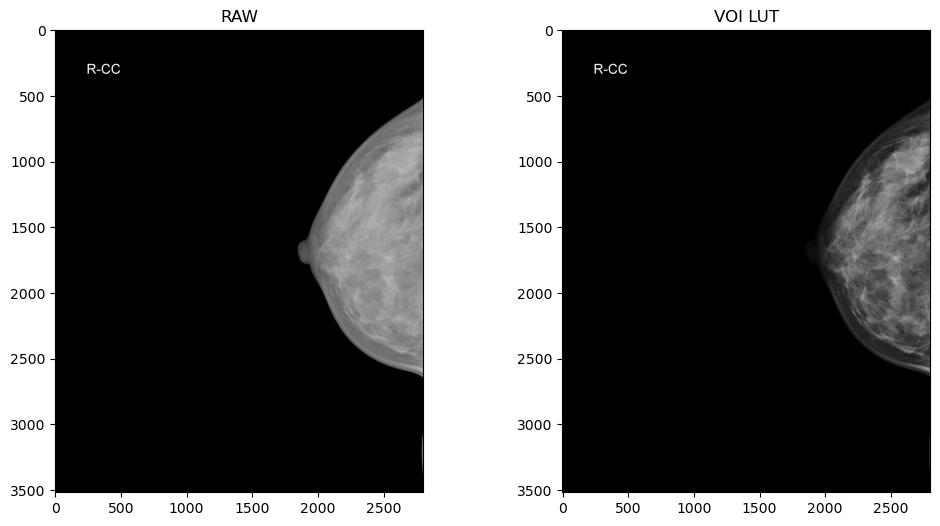

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("RAW")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("VOI LUT")
plt.imshow(img_voi, cmap='gray')

In [67]:
ds3 = pydicom.dcmread(image_path3)

In [68]:
print(ds3)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10008.1.1591370361
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10008.1.1591370361
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183902.513856'
(0010, 0020) Patient ID                          LO: '10008'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10008
(0020, 000e) Series Instance

In [65]:
img = load_image_pydicom(image_path3)
img_voi = load_image_pydicom(image_path3, voi_lut=True)

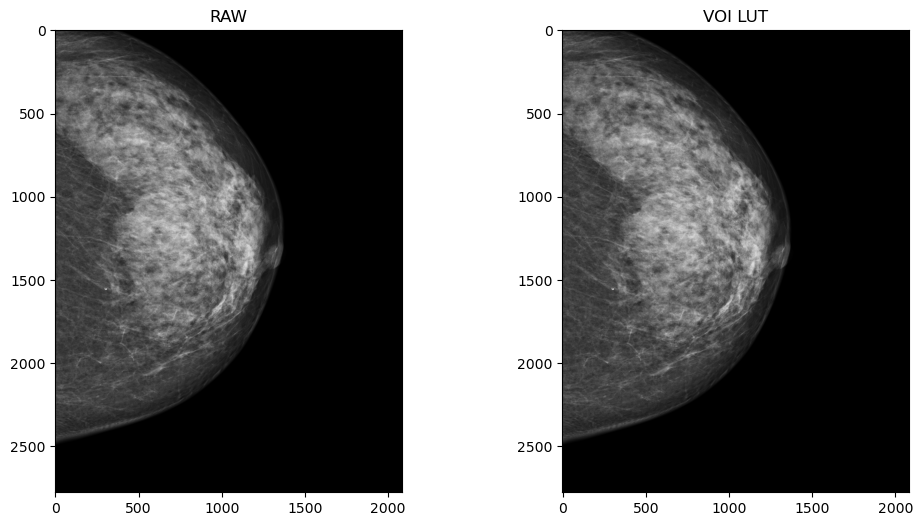

In [66]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("RAW")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("VOI LUT")
plt.imshow(img_voi, cmap='gray')

In [74]:
img = load_image_pydicom(image_path3)
img_voi = load_image_pydicom(image_path3, modality_lut=True)

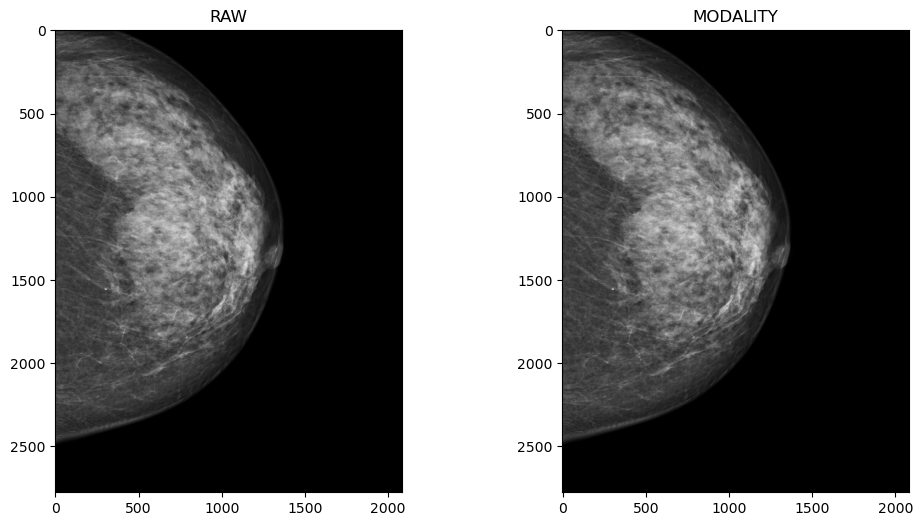

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("RAW")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("MODALITY")
plt.imshow(img_voi, cmap='gray')

In [10]:
img = load_image_pydicom(image_path3)
img_voi = load_image_pydicom(image_path3, windowing=True)

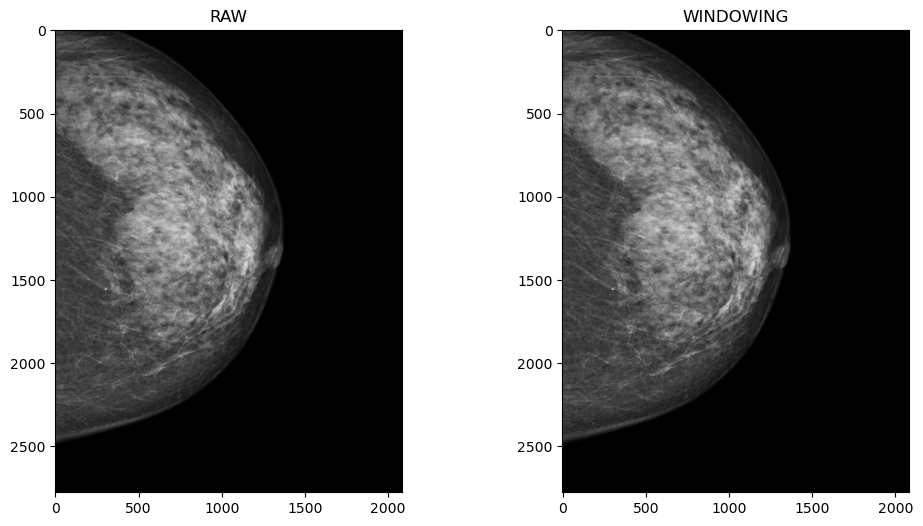

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("RAW")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("WINDOWING")
plt.imshow(img_voi, cmap='gray')

In [26]:
img = load_image_pydicom(image_path3)
psf = np.ones((7, 7)) 
img_w = restoration.wiener(img, psf, 0.01)

In [29]:
img.shape

(2776, 2082)

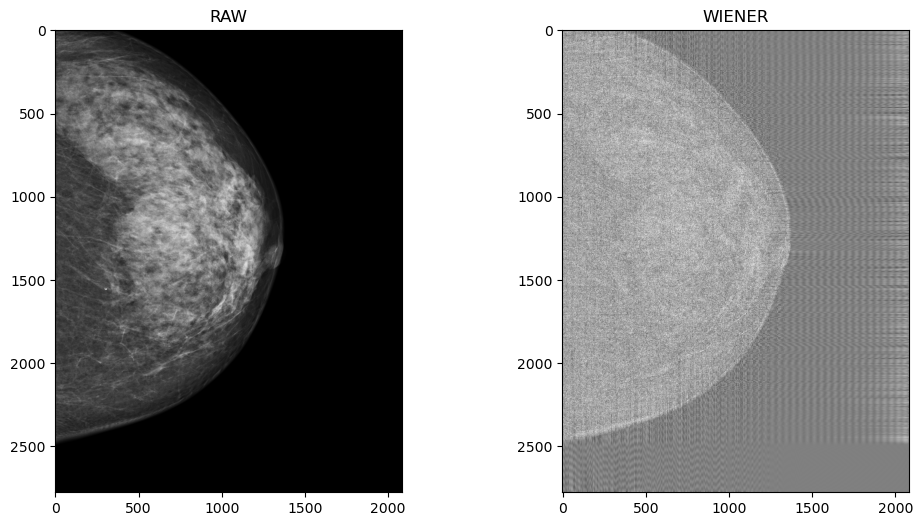

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("RAW")
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("WIENER")
plt.imshow(img_w, cmap='gray')

In [199]:
img, ds = load_image_pydicom(image_path5a, voi_lut=True, return_ds=True)


In [201]:
_, img_thres = cv2.threshold(img, 0.1, 255, cv2.THRESH_BINARY)

In [202]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
opening = cv2.morphologyEx(img_thres, cv2.MORPH_OPEN, kernel)

In [203]:
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


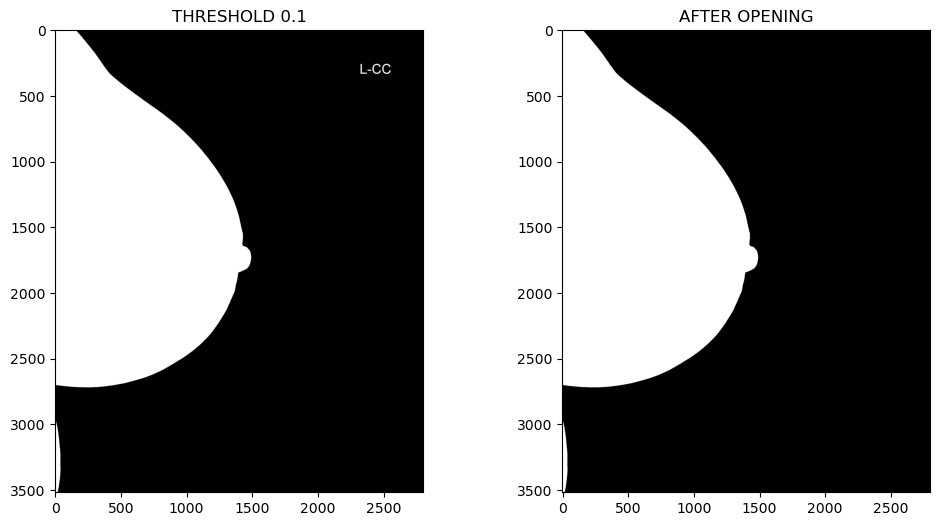

In [157]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("THRESHOLD 0.1")
plt.imshow(img_thres, cmap='gray')

plt.subplot(122)
plt.title("AFTER OPENING")
plt.imshow(opening, cmap='gray')

In [142]:
opening = opening.astype(np.uint8)

In [143]:
img_out = cv2.bitwise_and(img, img, mask=opening)

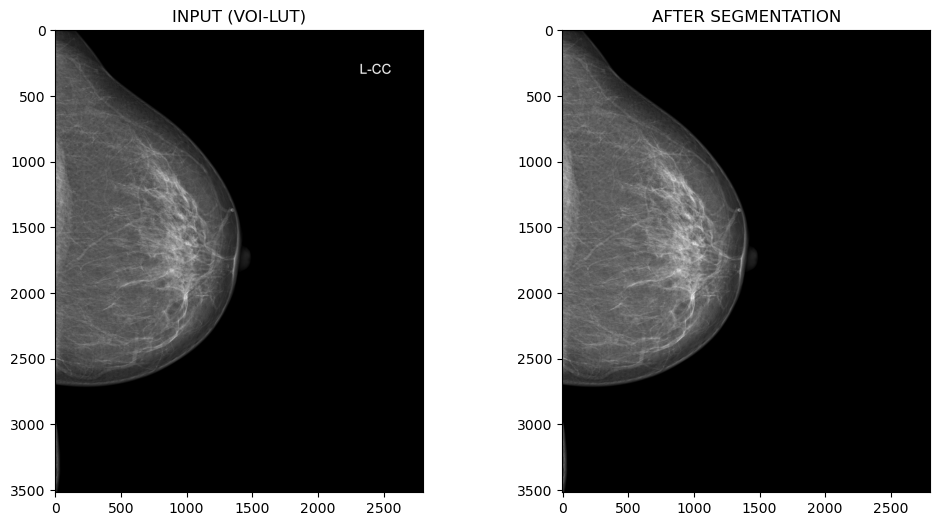

In [145]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("INPUT (VOI-LUT)")
plt.imshow(img, cmap='gray')


plt.subplot(122)
plt.title("AFTER SEGMENTATION")
plt.imshow(img_out, cmap='gray')

# -------------------------------------------------

In [6]:
def dicom_image_segmentation(img, show_thres=False):
    
    _, img_thres = cv2.threshold(img, 0.1, 255, cv2.THRESH_BINARY)
    
    
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
#     opening = cv2.morphologyEx(img_thres, cv2.MORPH_OPEN, kernel)
#     closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
#     closing = closing.astype(np.uint8)
    
    kernel_erosion = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
    erosion = cv2.erode(img_thres, kernel_erosion, iterations=4)
    
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
    dilation = cv2.dilate(erosion, kernel_dilate)
    
    dilation = dilation.astype(np.uint8)
    
    if show_thres:
        plt.figure(figsize=(12, 6))
        plt.imshow(dilation, cmap='gray')
    
    img_out = cv2.bitwise_and(img, img, mask=dilation)
    
    return img_out

In [8]:
img = load_image_pydicom(image_path, voi_lut=True)

In [9]:
img_out = dicom_image_segmentation(img)

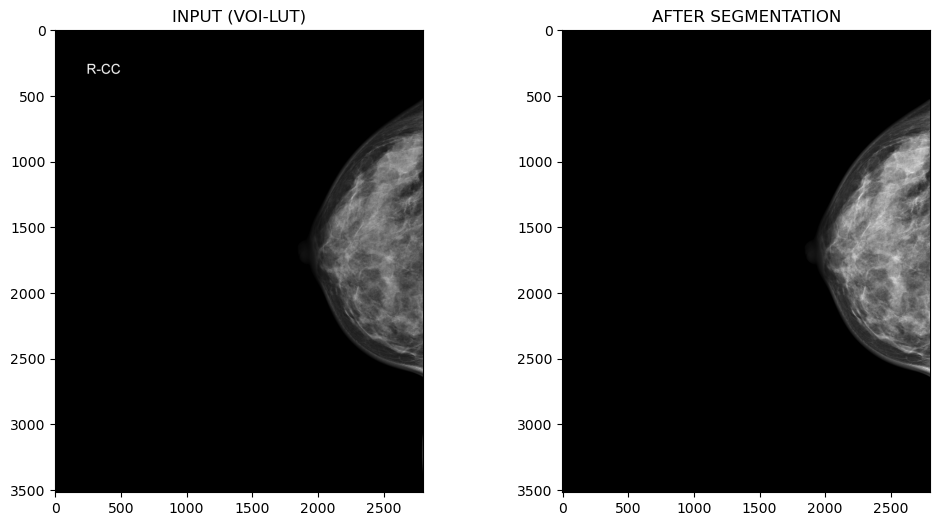

In [10]:
show_images(img, img_out, title1="INPUT (VOI-LUT)", title2="AFTER SEGMENTATION")

In [20]:
img_out.shape

(3518, 2800)

In [1]:
wiener_img = wiener(img_out, (3,3), 0.5)

NameError: name 'wiener' is not defined

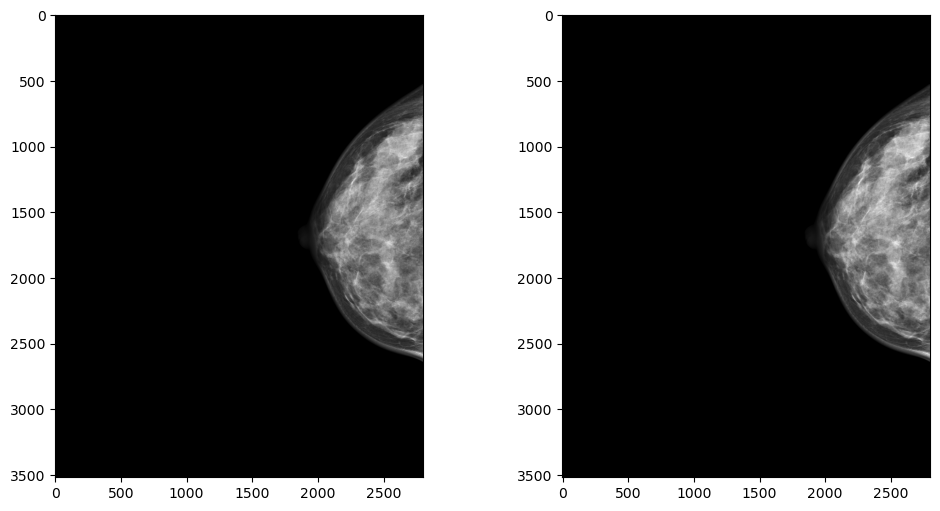

In [49]:
show_images(img_out, wiener_img)

In [36]:
clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(14,14))

In [37]:
clahe_img = clahe.apply(img_out)

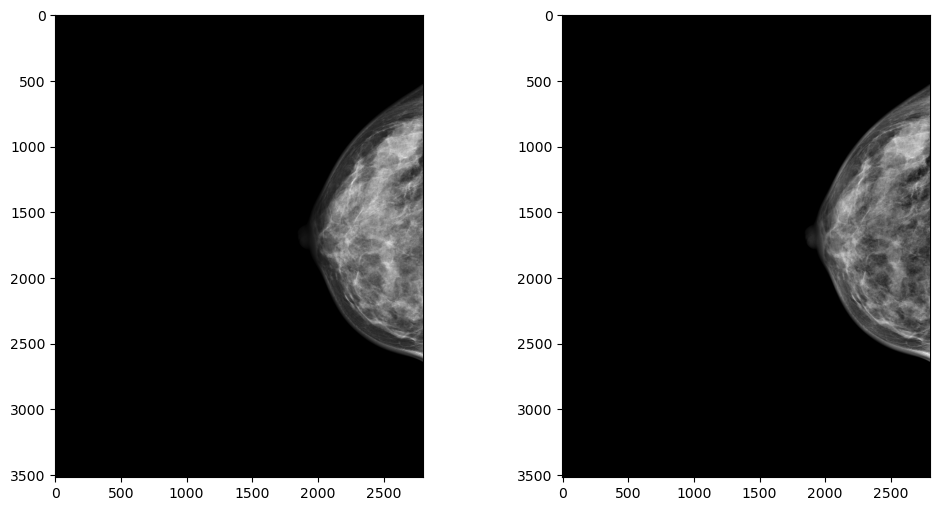

In [38]:
show_images(img_out, clahe_img)

In [39]:
img = load_image_pydicom(image_path4a, voi_lut=True)

In [40]:
img_out = dicom_image_segmentation(img)

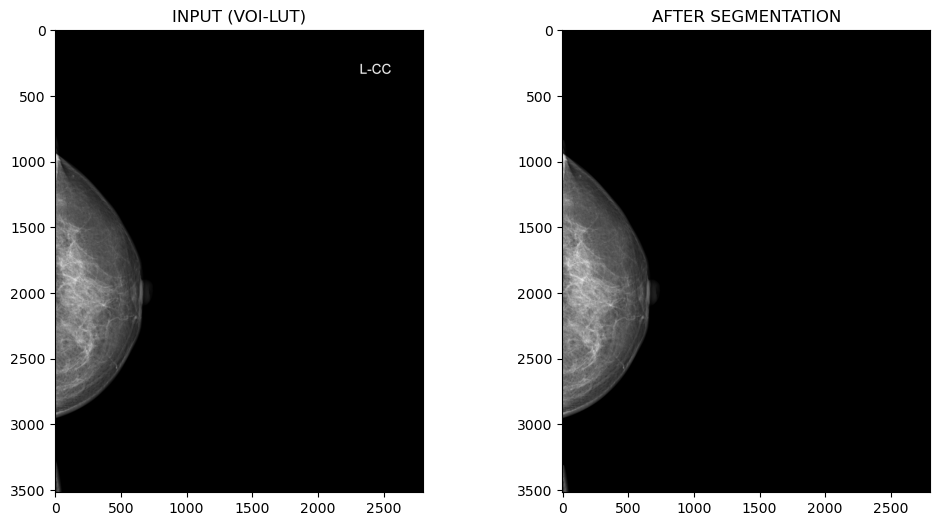

In [41]:
show_images(img, img_out, title1="INPUT (VOI-LUT)", title2="AFTER SEGMENTATION")

In [10]:
img = load_image_pydicom(image_path5a, voi_lut=True)

In [20]:
img.shape

(5355, 4915)

In [11]:
_, img_thres = cv2.threshold(img, 0.1, 255, cv2.THRESH_BINARY)

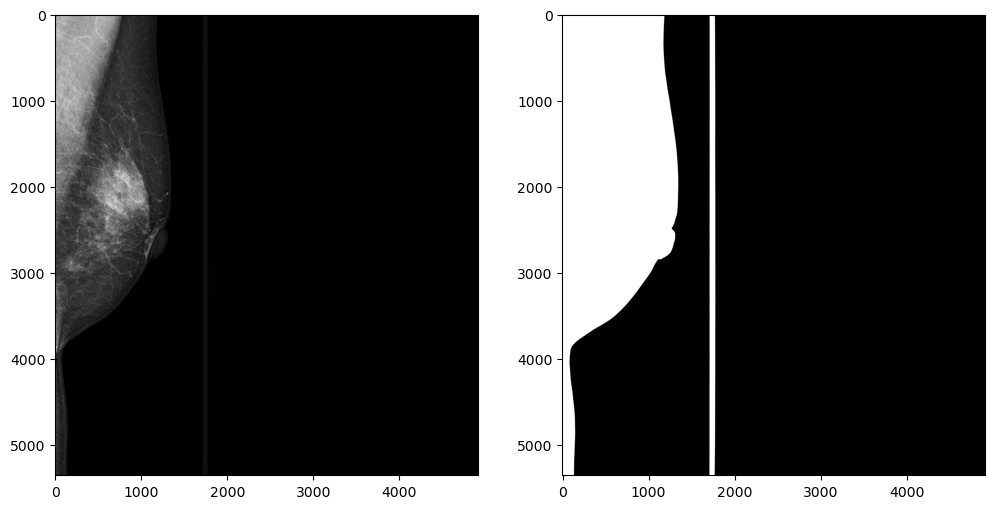

In [12]:
show_images(img, img_thres)

In [16]:
img_thres = img_thres.astype(np.uint8)

In [29]:
# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(img_thres,
                                            4,
                                            cv2.CV_32S)
(totalLabels, labels, stats, centroids) = analysis
  
# Initialize a new image to
# store all the output components
output = np.zeros(img.shape, dtype="uint8")

In [ ]:
# loop over the number of unique connected component labels
for i in range(0, totalLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
		i + 1, totalLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, totalLabels)
	# print a status message update for the current connected
	# component
	print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids[i]
    
    # clone our original image (so we can draw on it) and then draw
	# a bounding box surrounding the connected component along with
	# a circle corresponding to the centroid
	output = img.copy()
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    
    # construct a mask for the current connected component by
	# finding a pixels in the labels array that have the current
	# connected component ID
	componentMask = (labels == i).astype("uint8") * 255
	# show our output image and connected component mask
	#plt.imshow(output, cmap='gray')
	#plt.imshow(componentMask, cmap='gray')
	cv2.imshow("Output", output)
	cv2.imshow("Connected Component", componentMask)
	cv2.waitKey(0)

[INFO] examining component 1/3 (background)


[INFO] examining component 2/3


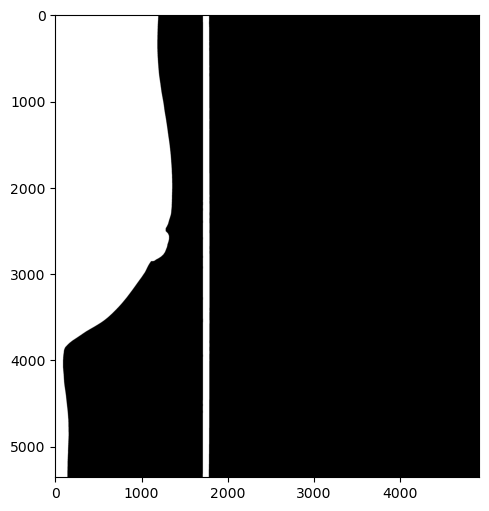

In [35]:
img_out = dicom_image_segmentation(img, show_thres=True) #Connected Components opencv #sieć unet 

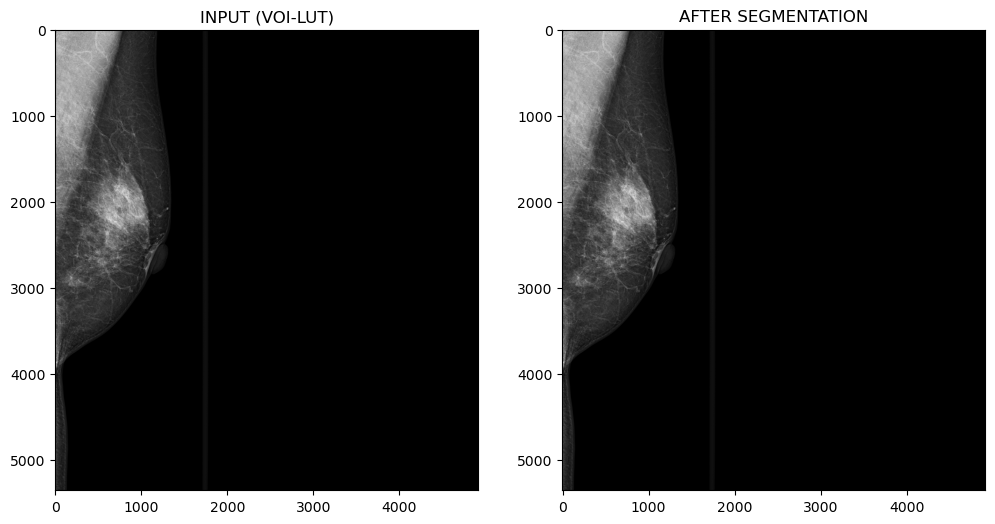

In [33]:
show_images(img, img_out, title1="INPUT (VOI-LUT)", title2="AFTER SEGMENTATION")

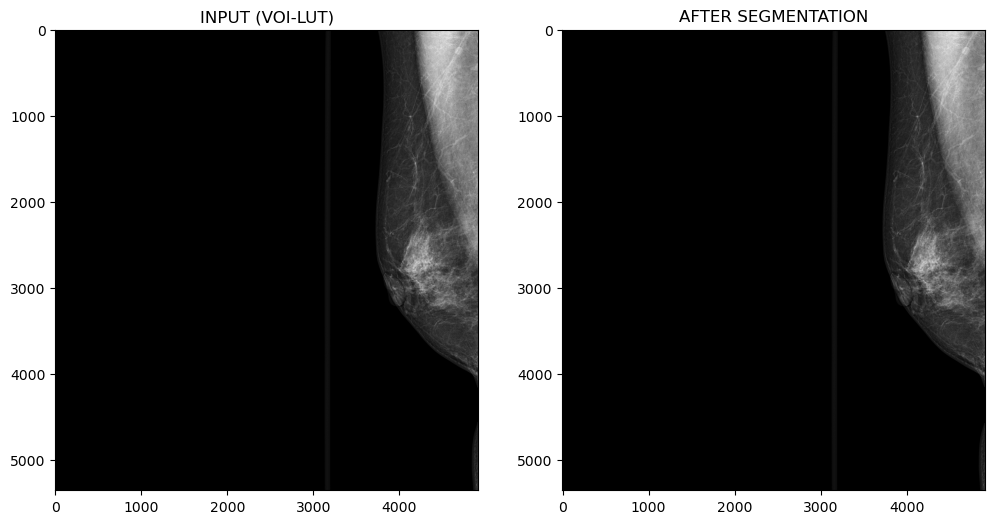

In [186]:
img = load_image_pydicom(image_path5b, voi_lut=True)

img_out = dicom_image_segmentation(img)

show_images(img, img_out, title1="INPUT (VOI-LUT)", title2="AFTER SEGMENTATION")

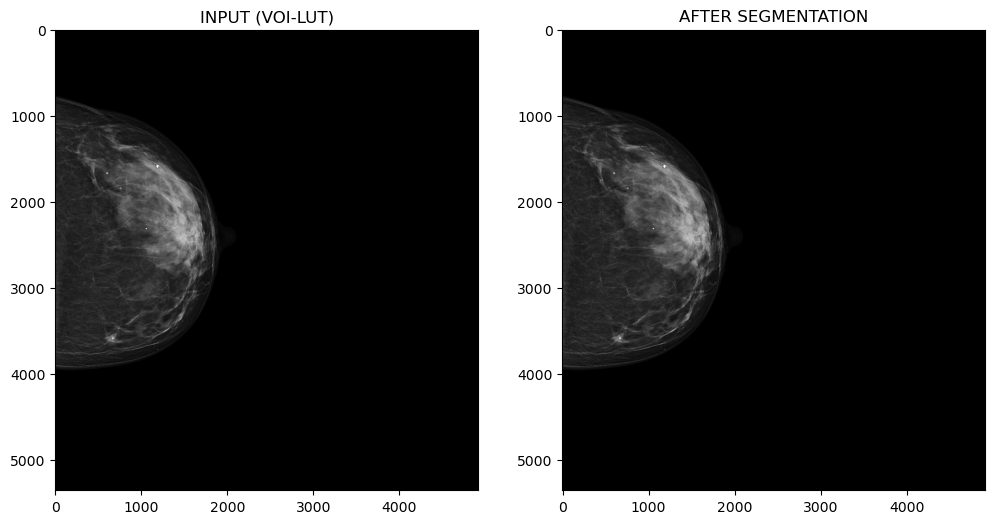

In [189]:
img = load_image_pydicom(image_path6, voi_lut=True)

img_out = dicom_image_segmentation(img)

show_images(img, img_out, title1="INPUT (VOI-LUT)", title2="AFTER SEGMENTATION")

In [25]:
ds7 = pydicom.dcmread(image_path7)

In [26]:
ds7

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.50186.1.28427247
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.50186.1.28427247
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '185131.136029'
(0010, 0020) Patient ID                          LO: '50186'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.50186
(0020, 000e) Series Instance UID

In [27]:
ds7.pixel_array

array([[   0,    0,    0, ..., 1990, 1997, 1948],
       [   0,    0,    0, ..., 2008, 2024, 2066],
       [   0,    0,    0, ..., 2013, 2030, 1960],
       ...,
       [   0,    0,    0, ..., 1735, 1689, 1669],
       [   0,    0,    0, ..., 1710, 1679, 1666],
       [   0,    0,    0, ..., 1673, 1656, 1690]], dtype=uint16)

In [23]:
len(ds7.pixel_array)

4096

In [29]:
ds5 = pydicom.dcmread(image_path9)

In [30]:
ds5

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.31056.1.79584811
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.31056.1.79584811
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184342.230722'
(0010, 0020) Patient ID                          LO: '31056'
(0018, 11a0) Body Part Thickness                 DS: '53.0'
(0018,

In [31]:
ds5.pixel_array

array([[ 654,  650,  649, ..., 3420, 3442, 3389],
       [ 656,  655,  654, ..., 3469, 3481, 3416],
       [ 654,  653,  652, ..., 3456, 3421, 3478],
       ...,
       [ 701,  702,  707, ..., 2931, 2961, 2870],
       [ 707,  708,  705, ..., 2933, 2926, 2865],
       [ 702,  705,  702, ..., 2958, 2973, 2869]], dtype=uint16)

In [32]:
ds5.pixel_array.shape

(2294, 1914)

In [34]:
img = load_image_pydicom(image_path9, voi_lut=True)

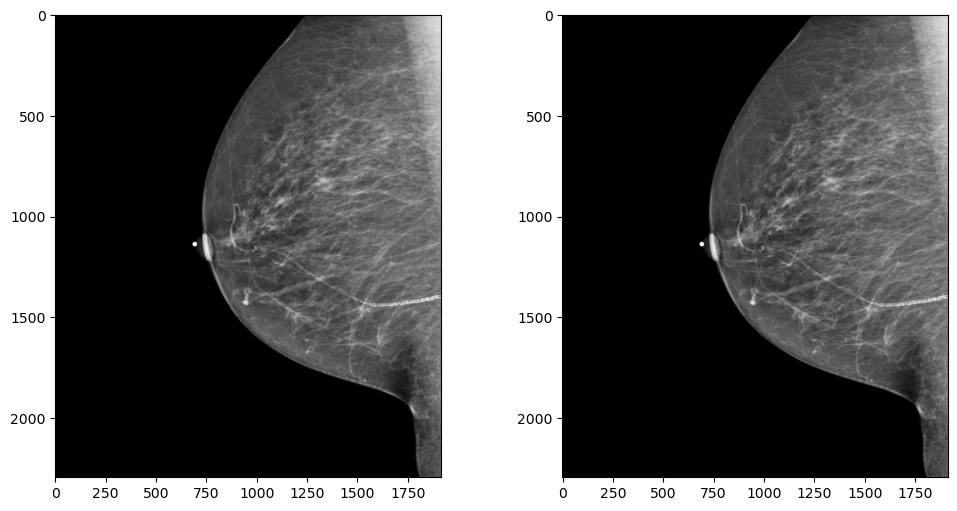

In [37]:
show_images(img, img)

In [39]:
img = img.astype(np.uint8)

(0.0, 256.0)

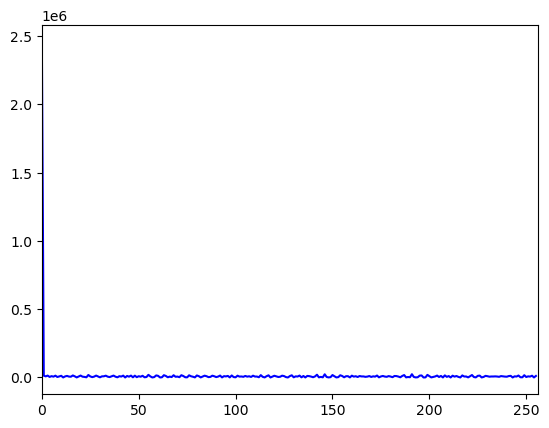

In [40]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='b')
plt.xlim([0, 256])